In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = torch.device('cpu') #device configuration
#Hyper parameters
num_epochs = 4
batch_size = 4
learning_rate = 0.001

In [3]:
#load cifar10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
train_dataset = torchvision.datasets.CIFAR10(root='./python_practice', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./python_practice', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


100%|███████████████████████████████████████████████████████████████████████████████| 170M/170M [00:31<00:00, 5.50MB/s]


Extracting ./python_practice\cifar-10-python.tar.gz to ./python_practice
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.88235295..0.9372549].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.94509804..0.8666667].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.88235295..0.92156863].


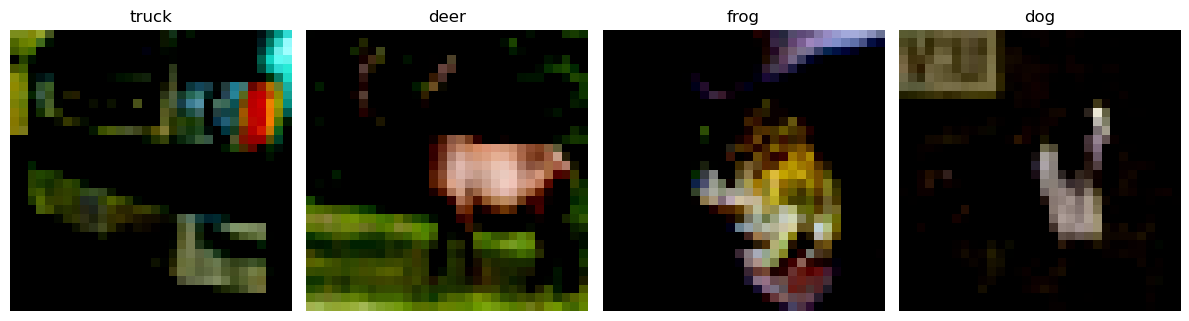

In [6]:
#get a batch of images and labels
images, labels = next(iter(train_loader))
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
#plot images
fig, axes = plt.subplots(1, batch_size, figsize=(12, 6)) #adjusted to batch size
for i, ax in enumerate(axes.flat):
    img = images[i].permute(1, 2, 0).numpy() # convert pytorch to numpy
    ax.imshow(img)
    ax.set_title(classes[labels[i]])
    ax.axis('off')
plt.tight_layout()
plt.show()

In [9]:
#implement conv net
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = ConvNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
#training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        #reshaping our image, origin shape: [4,3,32,32]=4,3,1024
        #input_layer: 3 input channels, 6 output channels,5 kernel size
        images = images.to(device)
        labels = labels.to(device)
        #forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        #backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1)%2000 == 0:
            print(f'epoch: {epoch+1}/{num_epochs}, step: {i+1}/{n_total_steps}, loss={loss.item():.4f}')
print('Finished Training')
#test and evaluation
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)

        _, predictions = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predictions == labels).sum().item()
        for i in range(batch_size):
            label = labels[i]
            pred = predictions[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc}')

    for i in range(10):
        acc = 100.0 * n_class_correct[i]/n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc}')
    

epoch: 1/4, step: 2000/12500, loss=2.2916
epoch: 1/4, step: 4000/12500, loss=2.3119
epoch: 1/4, step: 6000/12500, loss=2.2973
epoch: 1/4, step: 8000/12500, loss=2.2749
epoch: 1/4, step: 10000/12500, loss=2.2677
epoch: 1/4, step: 12000/12500, loss=2.1704
epoch: 2/4, step: 2000/12500, loss=2.1749
epoch: 2/4, step: 4000/12500, loss=1.8666
epoch: 2/4, step: 6000/12500, loss=1.8400
epoch: 2/4, step: 8000/12500, loss=1.2868
epoch: 2/4, step: 10000/12500, loss=2.2399
epoch: 2/4, step: 12000/12500, loss=1.8353
epoch: 3/4, step: 2000/12500, loss=1.3301
epoch: 3/4, step: 4000/12500, loss=2.0249
epoch: 3/4, step: 6000/12500, loss=1.3245
epoch: 3/4, step: 8000/12500, loss=1.9886
epoch: 3/4, step: 10000/12500, loss=1.6401
epoch: 3/4, step: 12000/12500, loss=1.4342
epoch: 4/4, step: 2000/12500, loss=1.3974
epoch: 4/4, step: 4000/12500, loss=1.6824
epoch: 4/4, step: 6000/12500, loss=1.6926
epoch: 4/4, step: 8000/12500, loss=1.5645
epoch: 4/4, step: 10000/12500, loss=0.7544
epoch: 4/4, step: 12000/125